In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
results_file = '../data/write/fig5a.h5ad'

In [2]:
sc.settings.set_figure_params(dpi=100, dpi_save=300)

In [3]:
adata = sc.read_csv('../data/tpm_sample_genes.csv', first_column_names=True)

In [4]:
adata

AnnData object with n_obs × n_vars = 96 × 15203 

In [5]:
adata.obs['subgroup'] = ['E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A','E11A',
                         'E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y','E11Y',
                         'E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F','E12F',
                         'E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F','E14F']

In [6]:
adata

AnnData object with n_obs × n_vars = 96 × 15203 
    obs: 'subgroup'

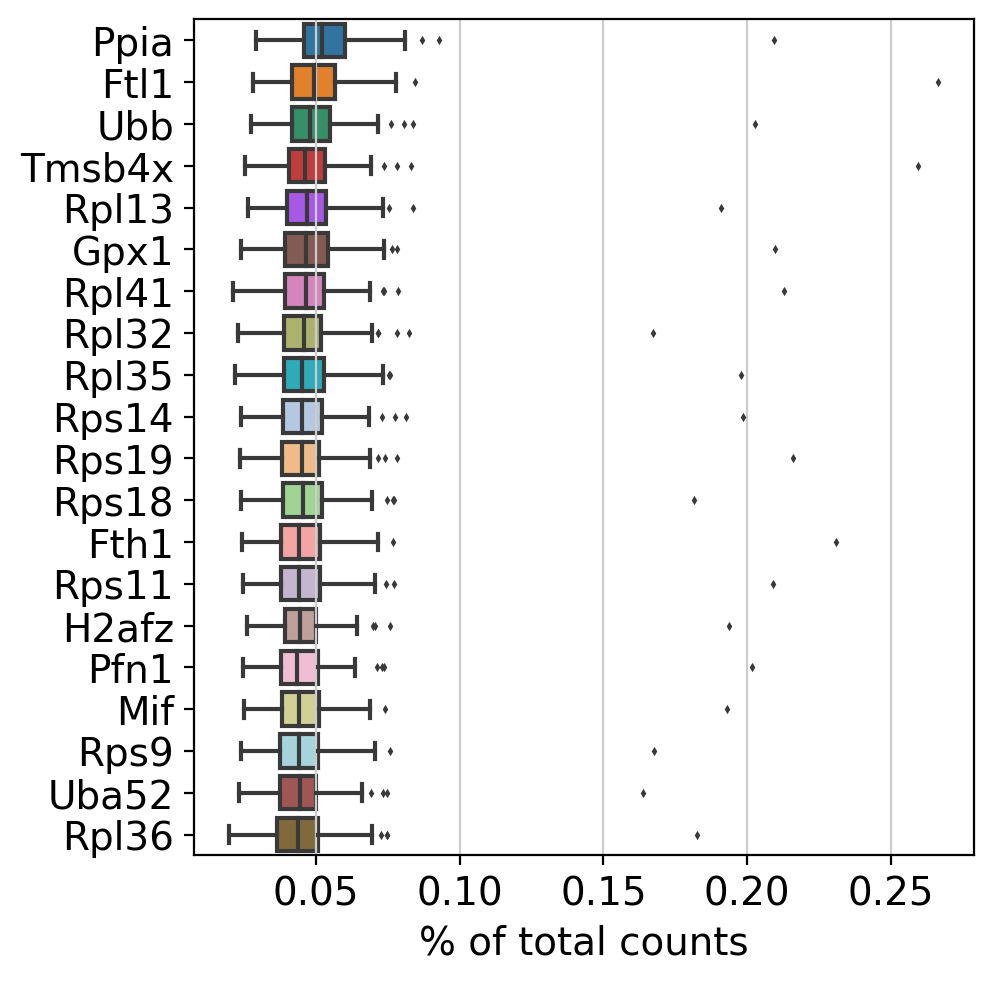

In [7]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [8]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 2306 genes that are detected in less than 3 cells


In [9]:
rbpj = adata[:, 'Rbpj'].X

In [10]:
rbpj

ArrayView([3.35614 , 0.871844, 2.3505  , 2.69377 , 3.31179 , 3.30889 ,
           0.807355, 3.18903 , 2.58496 , 2.87971 , 2.88753 , 3.39643 ,
           0.669027, 0.      , 4.26454 , 0.      , 1.23879 , 2.37851 ,
           0.      , 0.201634, 2.24793 , 0.      , 2.9542  , 0.344828,
           1.64155 , 0.      , 0.      , 0.      , 0.      , 0.      ,
           1.44361 , 2.70487 , 0.731183, 0.      , 0.      , 2.93923 ,
           0.      , 0.      , 0.176323, 0.      , 0.      , 2.48285 ,
           3.67129 , 2.72247 , 0.      , 5.61294 , 0.      , 0.      ,
           2.55582 , 2.82579 , 1.18269 , 0.815575, 0.432959, 3.31615 ,
           0.669027, 0.      , 3.05658 , 0.      , 1.15704 , 1.38405 ,
           2.28392 , 3.24641 , 0.189034, 0.238787, 1.98185 , 4.07639 ,
           0.      , 0.      , 5.50144 , 0.      , 0.      , 0.      ,
           3.63343 , 0.      , 4.04614 , 0.      , 0.      , 0.      ,
           0.      , 0.      , 3.15543 , 0.      , 1.926   , 0.      ,
      

In [11]:
notch1 = adata[:, 'Notch1'].X

In [12]:
notch1

ArrayView([1.88753  , 0.       , 1.65076  , 0.       , 0.275007 ,
           0.       , 0.       , 0.475085 , 1.58496  , 0.       ,
           3.03386  , 0.       , 3.51475  , 2.49313  , 0.       ,
           0.       , 0.250962 , 1.73118  , 0.       , 0.       ,
           0.584962 , 0.       , 0.333424 , 0.       , 0.       ,
           0.       , 0.       , 0.       , 0.0426443, 0.       ,
           2.69599  , 0.       , 0.       , 0.       , 0.       ,
           4.3978   , 0.       , 0.       , 0.       , 0.       ,
           4.51349  , 0.       , 0.       , 0.       , 0.       ,
           0.       , 0.       , 2.29572  , 2.23266  , 1.67807  ,
           0.214125 , 3.05832  , 0.       , 1.32769  , 2.52607  ,
           0.       , 3.63343  , 0.       , 0.       , 0.       ,
           2.21412  , 0.       , 0.       , 0.       , 2.52607  ,
           0.       , 4.6792   , 0.       , 0.       , 0.       ,
           2.10769  , 0.       , 0.       , 0.111031 , 0.       ,
          

In [13]:
adata.raw = adata

In [14]:
adata

AnnData object with n_obs × n_vars = 96 × 12897 
    obs: 'subgroup'
    var: 'n_cells'

In [15]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00.03)


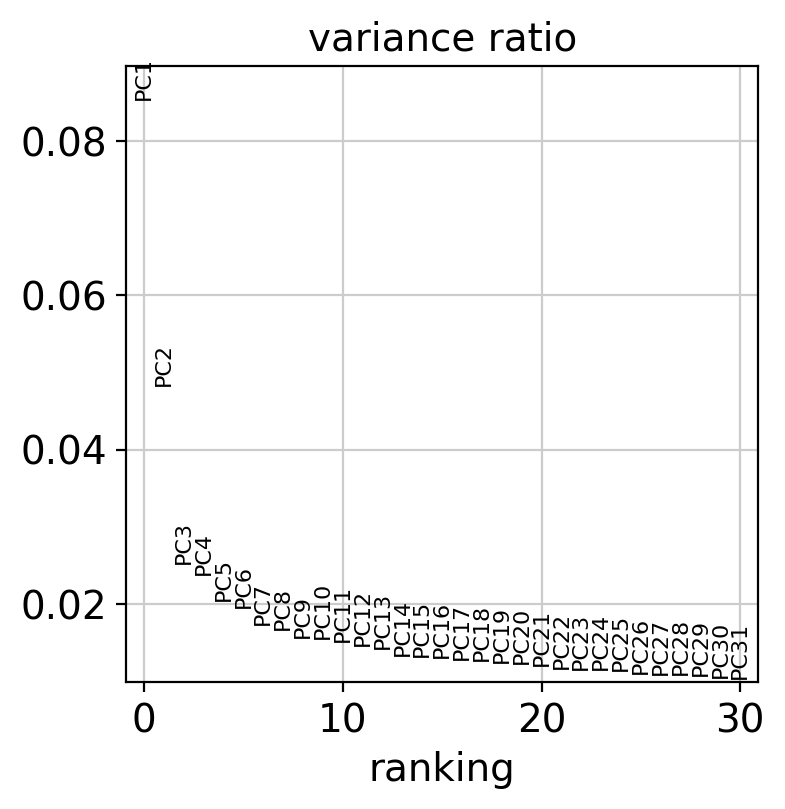

In [16]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata)

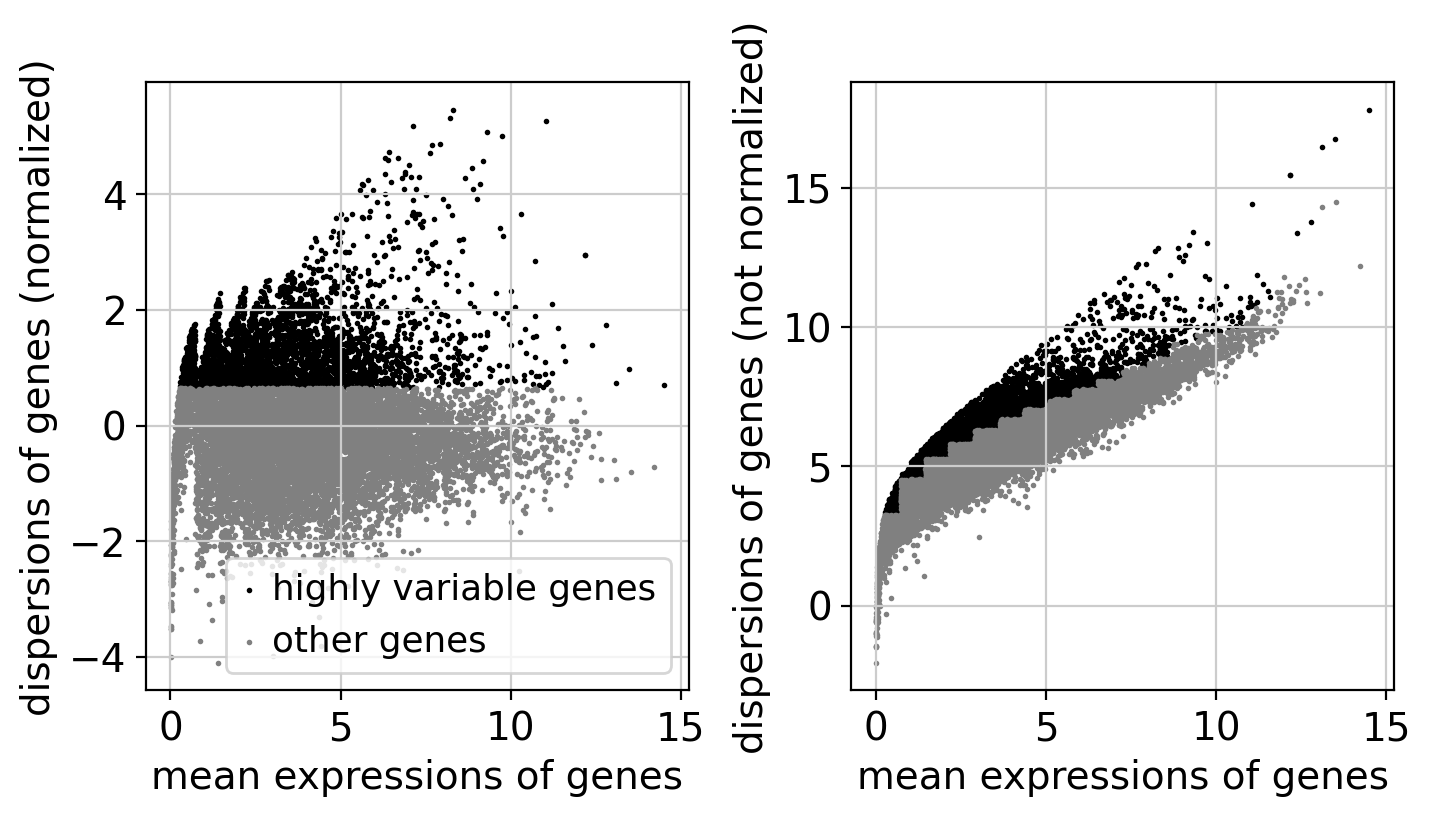

In [17]:
sc.pl.highly_variable_genes(adata)

In [18]:
adata = adata[:, adata.var['highly_variable']]

In [19]:
adata

View of AnnData object with n_obs × n_vars = 96 × 3000 
    obs: 'subgroup'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [20]:
adata.raw

In [21]:
sc.tl.pca(adata, svd_solver='arpack')

Trying to set attribute `.obsm` of view, making a copy.


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00.03)


... storing 'subgroup' as categorical


saving figure to file ./figures/pca_pca_3000_notch1.pdf


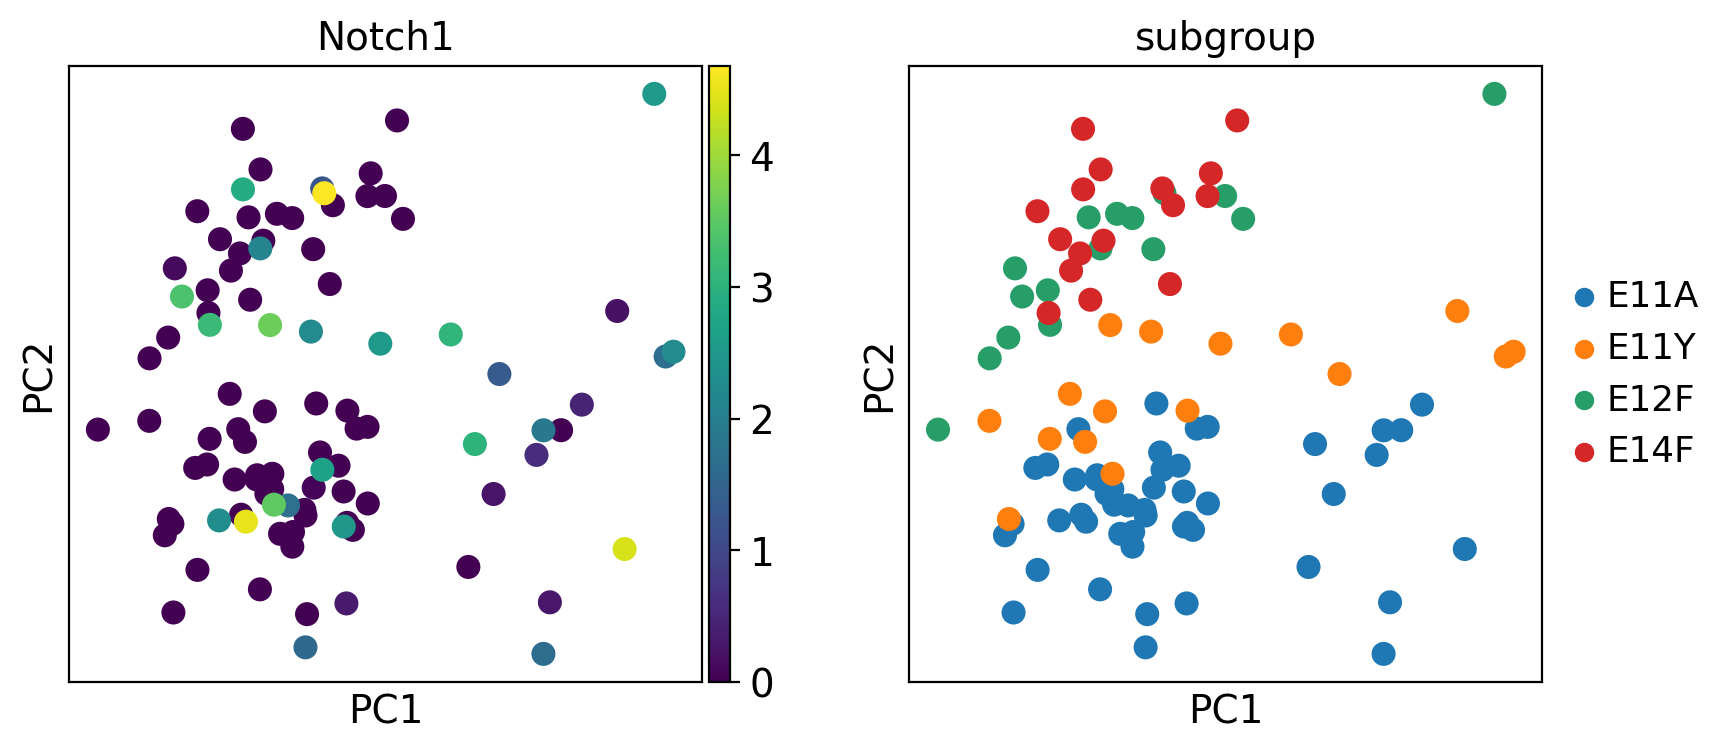

In [22]:
sc.pl.pca(adata, use_raw=True, color=['Notch1', 'subgroup'], size=300, save="_pca_3000_notch1.pdf")

In [23]:
adata.write(results_file)